<a href="https://colab.research.google.com/github/olfabre/amsProjetSemestre2/blob/main/Statistiques_fichier_EvalTXT_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

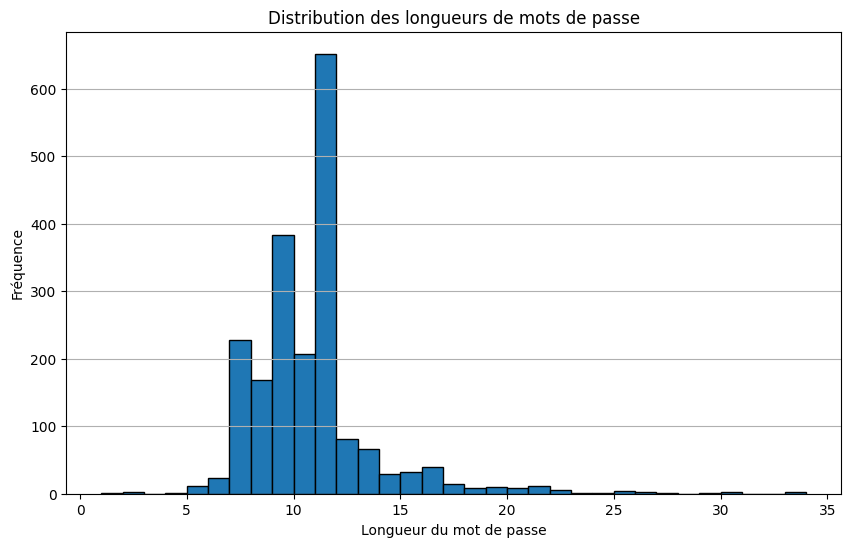

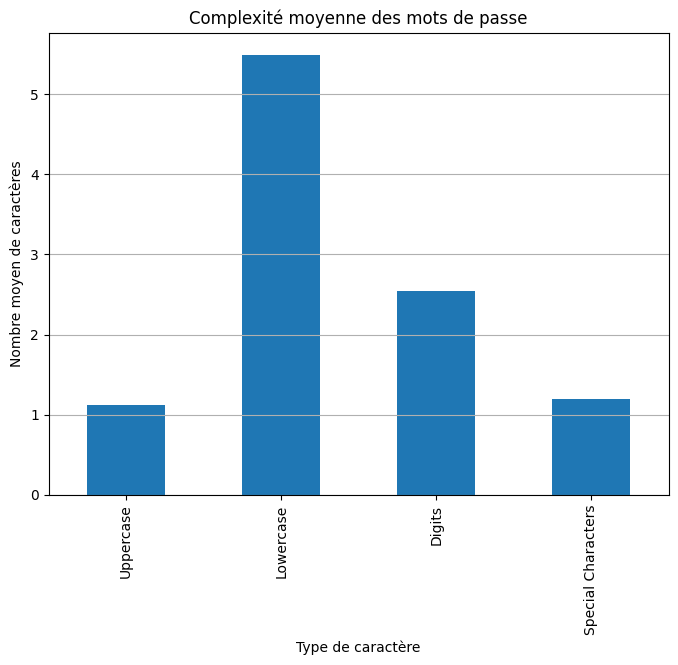

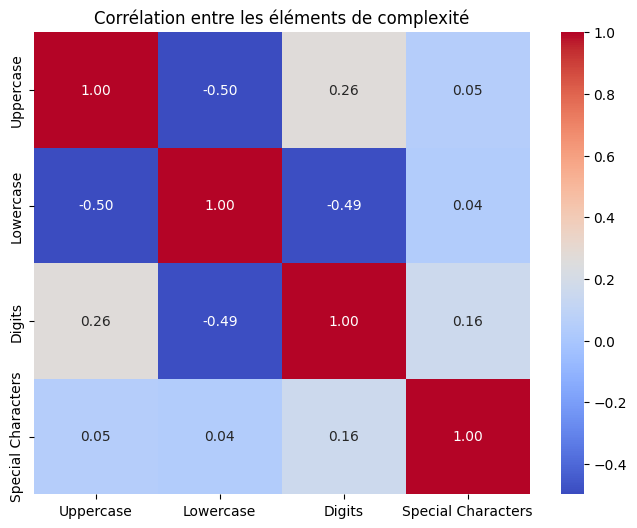

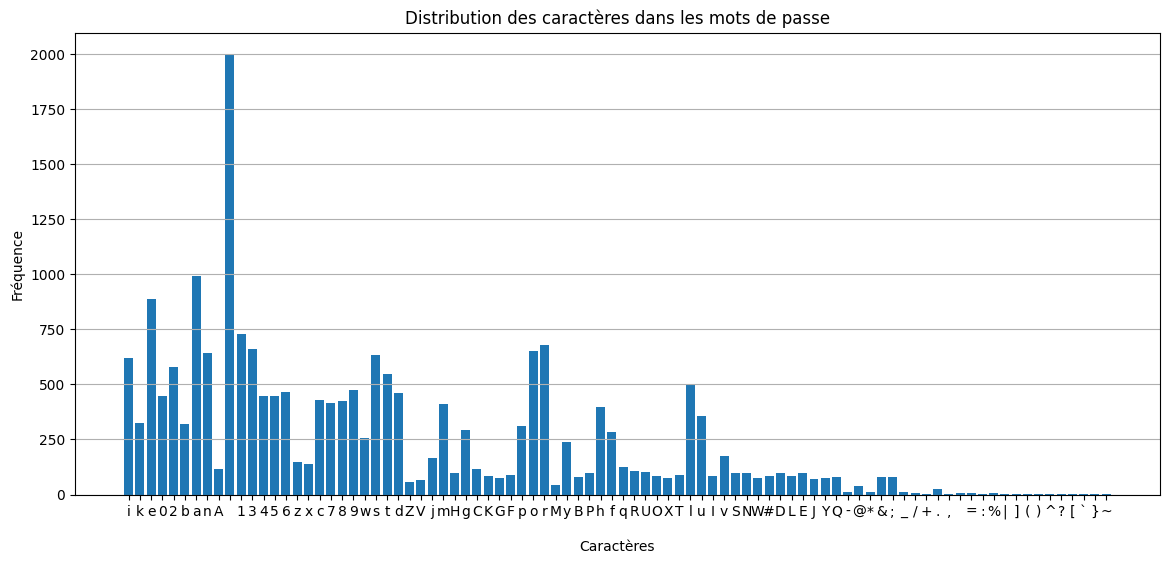

Complexité des mots de passe :


,Uppercase,Lowercase,Digits,Special Characters
0,1,7,2,0
1,0,0,6,1
2,0,6,0,1
3,0,0,9,1
4,0,8,0,1
...,...,...,...,...
1996,1,5,4,1
1997,0,5,3,1
1998,0,7,8,1
1999,9,6,9,6


Statistiques supplémentaires :
Proportion de mots de passe avec des majuscules : 40.53%
Proportion de mots de passe avec des minuscules : 97.75%
Proportion de mots de passe avec des chiffres : 74.71%
Proportion de mots de passe avec des caractères spéciaux : 99.95%


In [15]:
# Installer les bibliothèques nécessaires
!pip install matplotlib seaborn pandas

# Import des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

# Charger les données des mots de passe
file_path = 'eval.txt'

# Lire le contenu du fichier
with open(file_path, 'r') as file:
    content = file.read()

# Séparer les mots de passe par backslash
passwords = content.split('\\')

# Supprimer les chaînes vides
passwords = [pw for pw in passwords if pw]

# Créer un DataFrame pour l'analyse
df = pd.DataFrame(passwords, columns=['Password'])

# Distribution de la longueur des mots de passe
length_distribution = df['Password'].apply(len)

# Complexité des mots de passe : nombre de majuscules, minuscules, chiffres et caractères spéciaux
def password_complexity(password):
    return {
        'Uppercase': sum(1 for c in password if c.isupper()),
        'Lowercase': sum(1 for c in password if c.islower()),
        'Digits': sum(1 for c in password if c.isdigit()),
        'Special Characters': sum(1 for c in password if not c.isalnum())
    }

complexity_stats = df['Password'].apply(password_complexity)
complexity_df = pd.DataFrame(complexity_stats.tolist())

# Distribution des caractères
def character_distribution(passwords):
    return Counter(''.join(passwords))

char_dist = character_distribution(passwords)

# Visualisation
# 1. Distribution des longueurs de mots de passe
plt.figure(figsize=(10, 6))
plt.hist(length_distribution, bins=range(1, length_distribution.max() + 2), edgecolor='black')
plt.title('Distribution des longueurs de mots de passe')
plt.xlabel('Longueur du mot de passe')
plt.ylabel('Fréquence')
plt.grid(axis='y')
plt.show()

# 2. Moyenne des métriques de complexité
average_complexity = complexity_df.mean()

plt.figure(figsize=(8, 6))
average_complexity.plot(kind='bar')
plt.title('Complexité moyenne des mots de passe')
plt.xlabel('Type de caractère')
plt.ylabel('Nombre moyen de caractères')
plt.grid(axis='y')
plt.show()

# 3. Corrélation entre la longueur du mot de passe et sa complexité
correlation_matrix = complexity_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre les éléments de complexité')
plt.show()

# 4. Distribution des caractères
plt.figure(figsize=(14, 6))
plt.bar(char_dist.keys(), char_dist.values())
plt.title('Distribution des caractères dans les mots de passe')
plt.xlabel('Caractères')
plt.ylabel('Fréquence')
plt.grid(axis='y')
plt.show()

# Affichage de l'ensemble des données sur la complexité des mots de passe
print("Complexité des mots de passe :")
display(complexity_df)

# Statistiques supplémentaires
additional_stats = {
    'Proportion de mots de passe avec des majuscules': (complexity_df['Uppercase'] > 0).mean(),
    'Proportion de mots de passe avec des minuscules': (complexity_df['Lowercase'] > 0).mean(),
    'Proportion de mots de passe avec des chiffres': (complexity_df['Digits'] > 0).mean(),
    'Proportion de mots de passe avec des caractères spéciaux': (complexity_df['Special Characters'] > 0).mean()
}

print("Statistiques supplémentaires :")
for key, value in additional_stats.items():
    print(f"{key} : {value:.2%}")


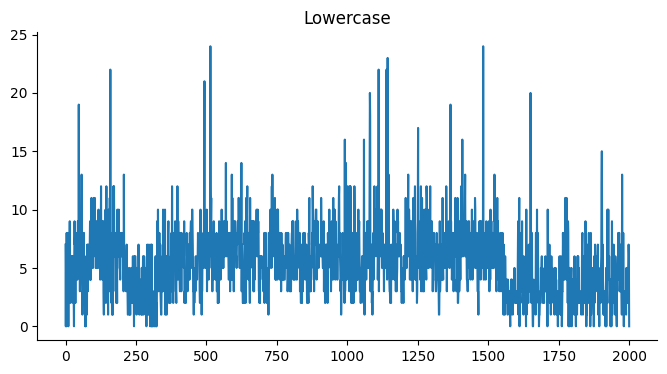

In [13]:
from matplotlib import pyplot as plt
complexity_df['Lowercase'].plot(kind='line', figsize=(8, 4), title='Lowercase')
plt.gca().spines[['top', 'right']].set_visible(False)

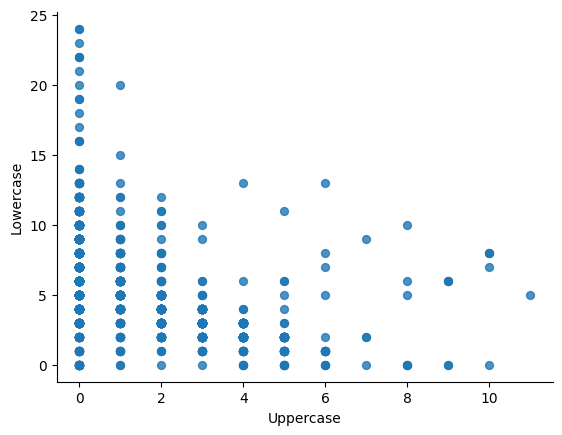

In [14]:
from matplotlib import pyplot as plt
complexity_df.plot(kind='scatter', x='Uppercase', y='Lowercase', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

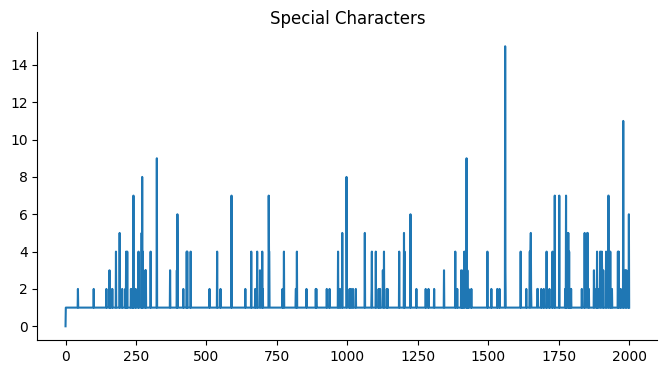

In [8]:
# @title Special Characters

from matplotlib import pyplot as plt
complexity_df['Special Characters'].plot(kind='line', figsize=(8, 4), title='Special Characters')
plt.gca().spines[['top', 'right']].set_visible(False)

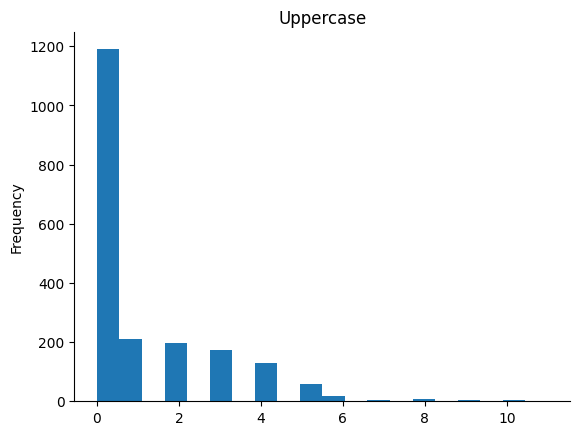

In [7]:
# @title Uppercase

from matplotlib import pyplot as plt
complexity_df['Uppercase'].plot(kind='hist', bins=20, title='Uppercase')
plt.gca().spines[['top', 'right',]].set_visible(False)